In [2]:

import csv
import os
import sys
import re
import json
import argparse

import numpy as np


In [34]:
import os
import pandas as pd
import matplotlib.pyplot as plt
data_file = os.path.join(os.getcwd(), 'data/towary_spozywcze_lata.csv')


data = pd.read_csv(data_file, delimiter=';')



data.head()

# convert wartosc to floats
data['wartosc'] = data['wartosc'].str.replace(',', '.').astype(float)


    


In [52]:
inflation_data_file = os.path.join(os.getcwd(), 'data/Inflacja_lata.csv')
inflation_data = pd.read_csv(inflation_data_file, delimiter=',')


#make the X axis show every year

inflation_data['wartosc'] = inflation_data['wartosc'] - 100

# make more rok labels visible
inflation_data.plot(x='rok', y='wartosc', kind='line')
plt.rcParams['figure.figsize'] = [10, 6]
plt.title('Inflacja w latach 1999-2023')
plt.xticks(inflation_data['rok']
    rotation=45)
plt.xlabel('Rok')
plt.ylabel('Inflacja [%]')


plt.show()

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' on line 13 (3870150405.py, line 14)

In [4]:
## list all unique nazwa_pozycja_2
data['nazwa_pozycja_2'].unique()

array(['chleb pszenno-żytni za 0.5 kg', 'mąka pszenna za 1 kg',
       'kasza jęczmienna za 0.5 kg',
       'mięso wołowe z kością (rostbef) za 1 kg',
       'mięso wołowe bez kości (z udźca) za 1 kg',
       'mięso wieprzowe z kością (schab środkowy) za 1 kg',
       'kurczęta patroszone za 1 kg', 'szynka wieprzowa gotowana za 1 kg',
       'polędwica drobiowa za 1 kg', 'kiełbasa wędzona za 1 kg',
       'filety z morszczuka mrożone za 1 kg',
       'mleko krowie spożywcze o zawartości tłuszczu 3-3,5%, sterylizowane za 1 l',
       'ser twarogowy półtłusty za 1 kg', 'jaja kurze świeże za 1 szt',
       'masło świeże o zawartości tłuszczu ok. 82,5% za 200 g',
       'olej rzepakowy produkcji krajowej za 1 l', 'pomarańcze za 1 kg',
       'jabłka za 1 kg', 'buraki za 1 kg', 'marchew za 1 kg',
       'cebula za 1 kg', 'ziemniaki za 1 kg',
       'cukier biały kryształ za 1 kg', 'sok jabłkowy za 1 l'],
      dtype=object)

In [5]:
data['opis_okres']

0      2010 M12
1      2010 M12
2      2010 M12
3      2010 M12
4      2010 M12
         ...   
331    2023 M12
332    2023 M12
333    2023 M12
334    2023 M12
335    2023 M12
Name: opis_okres, Length: 336, dtype: object

In [6]:
data['nazwa_pozycja_2'].unique()

array(['chleb pszenno-żytni za 0.5 kg', 'mąka pszenna za 1 kg',
       'kasza jęczmienna za 0.5 kg',
       'mięso wołowe z kością (rostbef) za 1 kg',
       'mięso wołowe bez kości (z udźca) za 1 kg',
       'mięso wieprzowe z kością (schab środkowy) za 1 kg',
       'kurczęta patroszone za 1 kg', 'szynka wieprzowa gotowana za 1 kg',
       'polędwica drobiowa za 1 kg', 'kiełbasa wędzona za 1 kg',
       'filety z morszczuka mrożone za 1 kg',
       'mleko krowie spożywcze o zawartości tłuszczu 3-3,5%, sterylizowane za 1 l',
       'ser twarogowy półtłusty za 1 kg', 'jaja kurze świeże za 1 szt',
       'masło świeże o zawartości tłuszczu ok. 82,5% za 200 g',
       'olej rzepakowy produkcji krajowej za 1 l', 'pomarańcze za 1 kg',
       'jabłka za 1 kg', 'buraki za 1 kg', 'marchew za 1 kg',
       'cebula za 1 kg', 'ziemniaki za 1 kg',
       'cukier biały kryształ za 1 kg', 'sok jabłkowy za 1 l'],
      dtype=object)

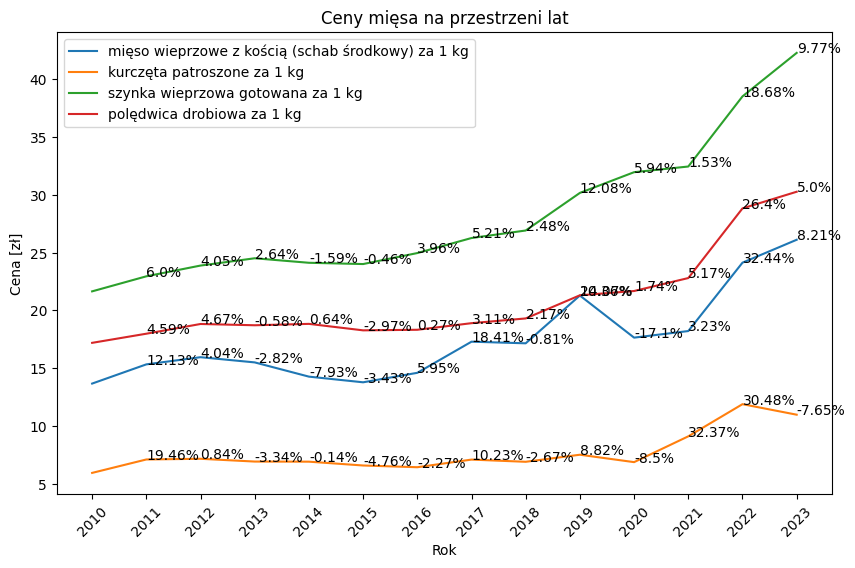

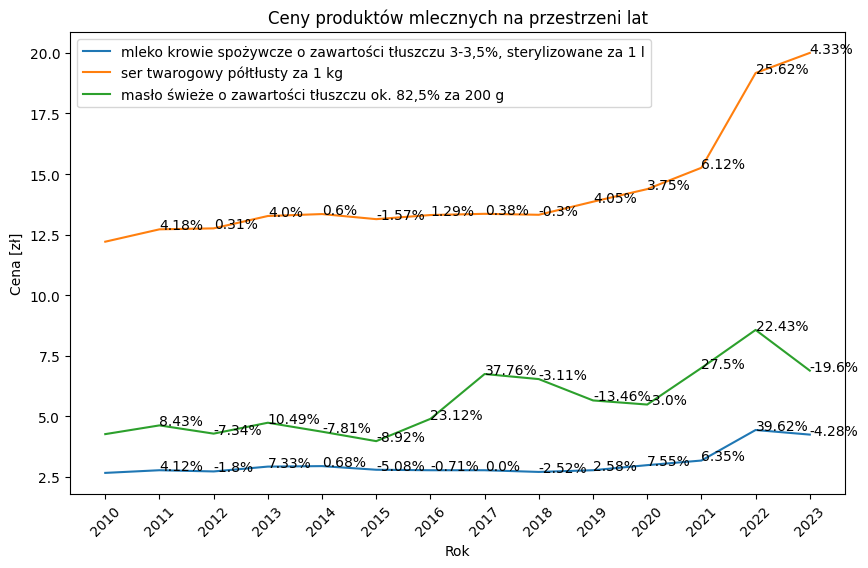

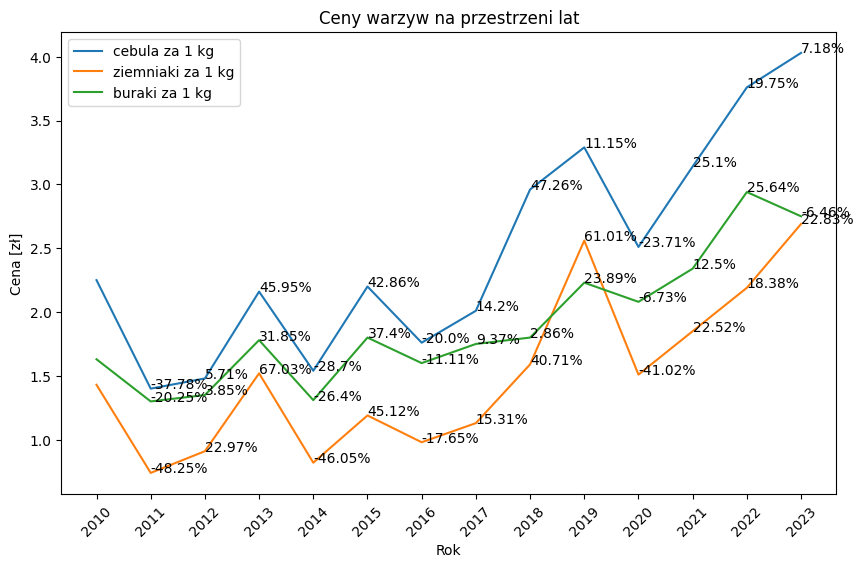

Text(0.5, 1.0, 'Ceny owoców na przestrzeni lat')

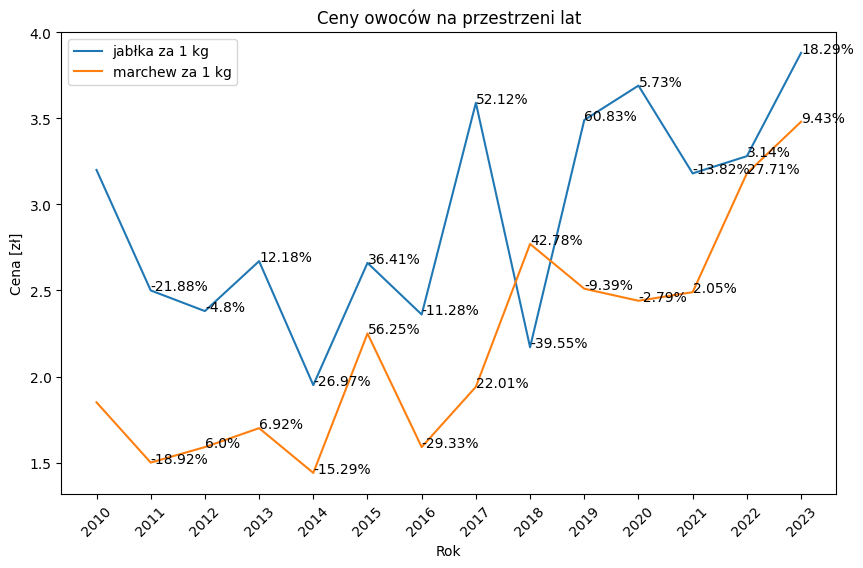

In [49]:
relevent_data = ['chleb pszenno-żytni za 0.5 kg', 'mięso wieprzowe z kością (schab środkowy) za 1 kg', 'kurczęta patroszone za 1 kg', 'szynka wieprzowa gotowana za 1 kg', 'polędwica drobiowa za 1 kg', 'mleko krowie spożywcze o zawartości tłuszczu 3-3,5%, sterylizowane za 1 l', 'ser twarogowy półtłusty za 1 kg', 'jaja kurze świeże za 1 szt', 'masło świeże o zawartości tłuszczu ok. 82,5% za 200 g', 'cebula za 1 kg', 'ziemniaki za 1 kg']
meat_data = ['mięso wieprzowe z kością (schab środkowy) za 1 kg', 'kurczęta patroszone za 1 kg', 'szynka wieprzowa gotowana za 1 kg', 'polędwica drobiowa za 1 kg']
dairy_data = ['mleko krowie spożywcze o zawartości tłuszczu 3-3,5%, sterylizowane za 1 l', 'ser twarogowy półtłusty za 1 kg', 'masło świeże o zawartości tłuszczu ok. 82,5% za 200 g']
vegetable_data = ['cebula za 1 kg', 'ziemniaki za 1 kg',  'buraki za 1 kg']
fruit_data = ['jabłka za 1 kg', 'marchew za 1 kg']

# make all opis_okres in data only leave 4 fist characters
data['opis_okres'] = data['opis_okres'].str[:4]


# Increase the size of the plots
plt.rcParams['figure.figsize'] = [10, 6]



#
for item in meat_data:
    data_item = data[data['nazwa_pozycja_2'] == item]
    #draw the procent increase of price in the point 
    plt.plot(data_item['opis_okres'], data_item['wartosc'], label=item)
    for i in range(1, len(data_item)):
        plt.text(data_item.iloc[i]['opis_okres'], data_item.iloc[i]['wartosc'], str(round((data_item.iloc[i]['wartosc'] - data_item.iloc[i-1]['wartosc'])/data_item.iloc[i-1]['wartosc']*100, 2)) + '%')

    
plt.xticks(rotation=45)
plt.legend()
plt.xlabel('Rok')
plt.ylabel('Cena [zł]')
plt.title('Ceny mięsa na przestrzeni lat')
plt.show()

for item in dairy_data:
    data_item = data[data['nazwa_pozycja_2'] == item]
    plt.plot(data_item['opis_okres'], data_item['wartosc'], label=item)
    for i in range(1, len(data_item)):
        plt.text(data_item.iloc[i]['opis_okres'], data_item.iloc[i]['wartosc'], str(round((data_item.iloc[i]['wartosc'] - data_item.iloc[i-1]['wartosc'])/data_item.iloc[i-1]['wartosc']*100, 2)) + '%')

plt.xticks(rotation=45)
plt.legend()
plt.xlabel('Rok')
plt.ylabel('Cena [zł]')
plt.title('Ceny produktów mlecznych na przestrzeni lat')
plt.show()

for item in vegetable_data:
    data_item = data[data['nazwa_pozycja_2'] == item]
    plt.plot(data_item['opis_okres'], data_item['wartosc'], label=item)
    for i in range(1, len(data_item)):
        plt.text(data_item.iloc[i]['opis_okres'], data_item.iloc[i]['wartosc'], str(round((data_item.iloc[i]['wartosc'] - data_item.iloc[i-1]['wartosc'])/data_item.iloc[i-1]['wartosc']*100, 2)) + '%')

plt.xticks(rotation=45)
plt.legend()
plt.title('Ceny warzyw na przestrzeni lat')
plt.xlabel('Rok')
plt.ylabel('Cena [zł]')
plt.show()

for item in fruit_data:
    data_item = data[data['nazwa_pozycja_2'] == item]
    plt.plot(data_item['opis_okres'], data_item['wartosc'], label=item)
    for i in range(1, len(data_item)):
        plt.text(data_item.iloc[i]['opis_okres'], data_item.iloc[i]['wartosc'], str(round((data_item.iloc[i]['wartosc'] - data_item.iloc[i-1]['wartosc'])/data_item.iloc[i-1]['wartosc']*100, 2)) + '%')

plt.xticks(rotation=45)
plt.legend()
plt.xlabel('Rok')
plt.ylabel('Cena [zł]')
plt.title('Ceny owoców na przestrzeni lat')





# UWAGA DO klasyfikacji marchwii jako owoc użyto definicji uni europejskiej z dyrektywy Dyrektywa Rady 2001/113/WE z dnia 20 grudnia 2001 roku „odnosząca się do dżemów owocowych, galaretek i marmolady oraz słodzonego purée z kasztanów przeznaczonych do spożycia przez ludzi, która ustanawia zasady wspólnego rynku unijnego dla produktów określanych jako dżemy”.
